# VAC ASSIGNMENT
# Domino Stock Data

In [7]:
#import python libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
dataset = pd.read_csv('Dominos_Stock_Data.csv')

In [10]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-16,254.89,257.61,253.08,255.96,251.60,525200
1,2019-10-17,256.12,259.96,255.78,256.45,252.09,515100
2,2019-10-18,257.45,258.40,254.23,255.70,251.35,609900
3,2019-10-21,256.61,259.84,255.67,257.52,253.14,499600
4,2019-10-22,257.27,259.47,255.38,258.94,254.53,343100


In [12]:
dataset['Date'] = pd.to_datetime(dataset.Date)

In [13]:
dataset.shape

(505, 7)

In [14]:
dataset.drop('Adj Close', axis = 1, inplace = True)

In [15]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2019-10-16,254.89,257.61,253.08,255.96,525200
1,2019-10-17,256.12,259.96,255.78,256.45,515100
2,2019-10-18,257.45,258.40,254.23,255.70,609900
3,2019-10-21,256.61,259.84,255.67,257.52,499600
4,2019-10-22,257.27,259.47,255.38,258.94,343100


In [16]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [17]:
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    505 non-null    datetime64[ns]
 1   Open    505 non-null    float64       
 2   High    505 non-null    float64       
 3   Low     505 non-null    float64       
 4   Close   505 non-null    float64       
 5   Volume  505 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 23.8 KB


In [19]:
dataset.describe()

,Open,High,Low,Close,Volume
count,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,385.391723,390.291347,380.870416,385.614693,6.996162e+05
std,67.485552,67.673877,67.327659,67.378659,5.993578e+05
min,254.890000,257.610000,253.080000,255.700000,1.843000e+05
25%,353.730000,360.580000,347.730000,354.620000,4.495000e+05
50%,384.600000,387.580000,380.910000,383.920000,5.776000e+05
75%,418.090000,423.110000,415.740000,419.700000,7.863000e+05
max,541.990000,548.720000,536.110000,540.470000,1.027880e+07


<AxesSubplot:>

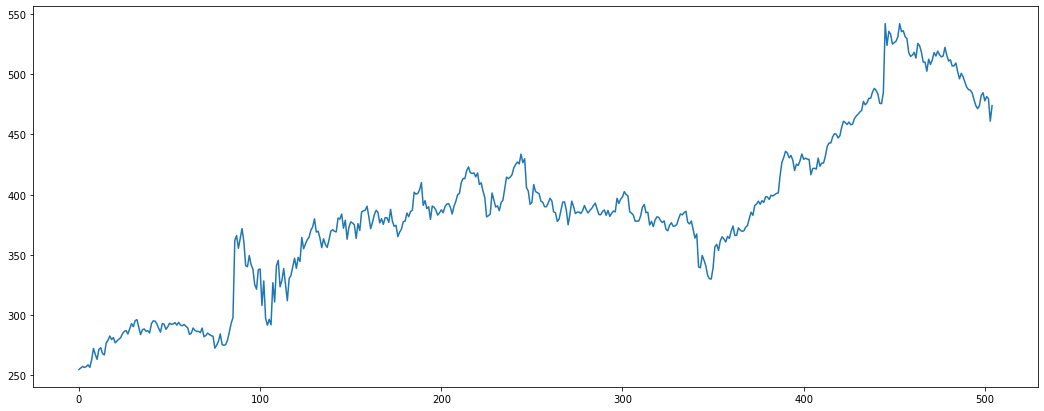

In [20]:
dataset['Open'].plot(figsize=(18, 7))

In [22]:
x = dataset[['Open', 'High', 'Low', 'Volume']]
y = dataset['Close']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [34]:
x_train.shape

(378, 4)

In [36]:
x_test.shape

(127, 4)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regression = LinearRegression()

In [40]:
regression.fit(x_train, y_train)

LinearRegression()

In [41]:
print(regression.coef_)

[-5.02974777e-01  7.95076774e-01  7.05712906e-01 -2.73552390e-07]


In [42]:
print(regression.intercept_)

0.6014236335823284


In [52]:
predict = regression.predict(x_test)

In [54]:
print(x_test)

       Open    High     Low   Volume
90   371.87  377.33  366.38  1107200
97   325.36  337.23  320.75   853400
477  515.08  522.22  512.85   319200
340  364.00  369.03  358.36   639000
395  420.00  447.50  419.24  1772100
..      ...     ...     ...      ...
134  356.01  367.30  349.09   868000
225  381.57  386.65  376.11   683100
402  429.50  432.07  425.74   870900
493  484.44  487.16  476.25   485500
59   290.78  291.35  287.10   933400

[127 rows x 4 columns]


In [47]:
predict.shape

(127,)

In [55]:
dframe = pd.DataFrame(y_test, predict)

In [57]:
dfr = pd.DataFrame({'Actual Price':y_test, 'Predicted Price':predict})

In [58]:
print(dfr)

     Actual Price  Predicted Price
90         366.67       371.822730
97         336.41       331.201256
477        521.37       518.571715
340        366.74       363.650264
395        425.44       440.527191
..            ...              ...
134        362.01       359.688948
225        376.32       381.336590
402        427.65       428.314555
493        476.96       480.232886
59         289.09       288.346878

[127 rows x 2 columns]


In [59]:
dfr.head(30)

,Actual Price,Predicted Price
90,366.67,371.822730
97,336.41,331.201256
477,521.37,518.571715
340,366.74,363.650264
395,425.44,440.527191
15,277.82,275.901093
318,381.12,379.492780
399,432.86,438.835598
159,382.78,385.434909
153,373.97,369.699194


In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [61]:
regression.score(x_test, y_test)

0.9972563178859308

In [62]:
import math

In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict))

Mean Absolute Error: 2.2674858486589082


In [64]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict))

Mean Squared Error: 11.357604487072631


In [65]:
print('Root Mean Absolute Error:', math.sqrt(metrics.mean_absolute_error(y_test, predict)))

Root Mean Absolute Error: 1.5058173357545424


In [66]:
graph = dfr.head(25)

<AxesSubplot:>

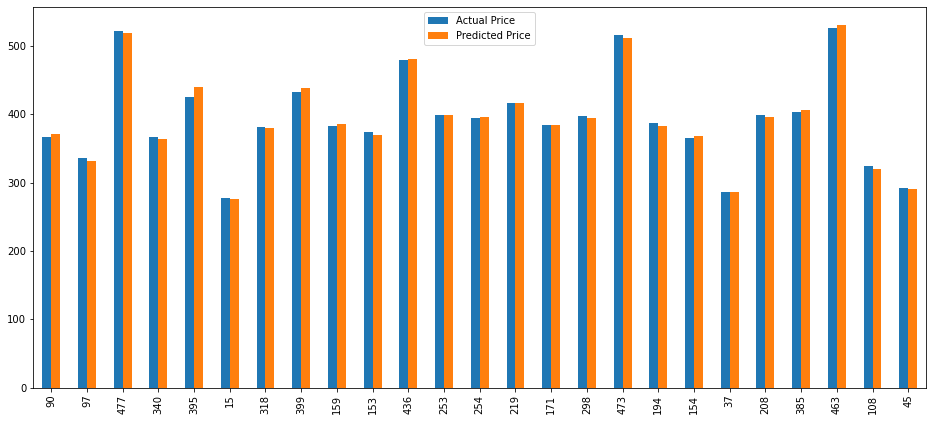

In [68]:
graph.plot(kind='bar', figsize=(16, 7))